# 8 Ways to do Linear Regression

[Article](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b)



[GitHub](https://github.com/tirthajyoti/PythonMachineLearning/blob/master/Linear_Regression_Methods.ipynb)


In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

### Generate random data of a sufficiently large size

In [46]:
# Sample data creation

# number of points
n = int(5e6)
t = np.linspace(-10,10,n) # ****

# parameters
a = 3.25; b = -6.5; c = 5.0;
x = polyval([a,b],t)
x3 = polyval([a,b,c],t)

# add some noise
xn = x+3*randn(n) # ****
xn3 = x3+3*randn(n) # ******

### Draw few random sample points and plot

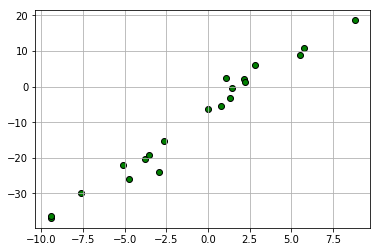

In [37]:
xvar = np.random.choice(t,size=20)
yvar = polyval([a,b], xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='g',edgecolors='k');
plt.grid(True)
plt.show()

## Method 1 :: Scipy.Polyfit

In [38]:
#Linear regression -polyfit - polyfit can be used on other orders of polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)

# compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 3.001
Time taken: 2.635150909423828 seconds


## Method 2 :: Stats.linregress

this is a highly specialized method in that it is can only take 2 dimensions eg. x & y
but it is highly optimized and runs faster than most other methods



In [39]:
#Linear regression using stats.linregress
t1=time.time()
(a_s, b_s, r, tt, stderr) = stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.llinregress')
print('a=%.2f b=%.2f, std erro = %.3f, r^2 coefficient= %.3f' % (a_s, b_s, stderr, r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.llinregress
a=3.25 b=-6.50, std erro = 0.000, r^2 coefficient= 0.987
Time taken: 0.2800312042236328 seconds


## Method 3 :: Optimize.curve_fit

This is similar to polyfit, but more general in nature.
It has run a little bit slower than the polyfit function on the same data.

In [40]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [41]:
t1=time.time()
p1=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0][0],p1[0][1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))
print('\n',p1[0],'\n',p1[1])

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 2.1229960918426514 seconds

 [ 3.25012345 -6.5017718 ] 
 [[ 5.40346288e-08 -8.43407797e-20]
 [-8.43407797e-20  1.80115500e-06]]


## Method 4 :: NumPY.linalg.lstsq

least square solution to a matrix equation

In [47]:
t1 = time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn3)
#ar, br = result[0]
#err = np.sqrt(result[1]/len(xn))
t2 = time.time()
t_linalg_lstsq = float(t2-t1)



/Users/darwinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


$\epsilon$ is sloppiness


$x=y$ if $|x-y| < \epsilon$